In [2]:
#import packages 
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import scipy.optimize as opt
import numpy.linalg as lin
%matplotlib inline

In [14]:
""" Problem 1 """

' Problem 1 '

In [3]:
#load data
data = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Econ/Wk4_StrEst/data/clms.txt", header = None,names = ['clms'])
print(data.head())

     clms
0  361.65
1  123.04
2  541.77
3  862.90
4   55.60


                clms
count   10619.000000
mean      720.277975
std      3972.850824
min         0.010000
25%        74.450000
50%       172.210000
75%       451.535000
max    227967.250000


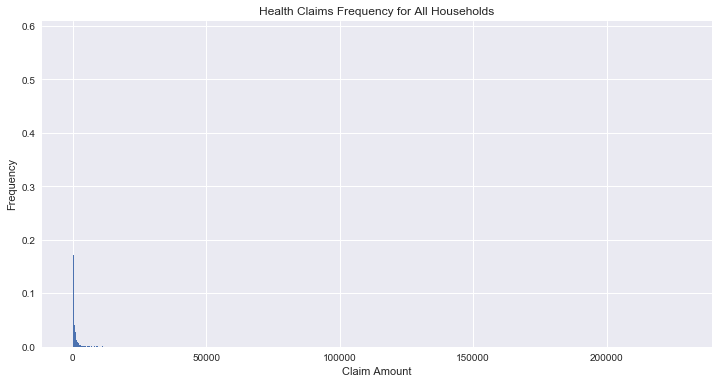

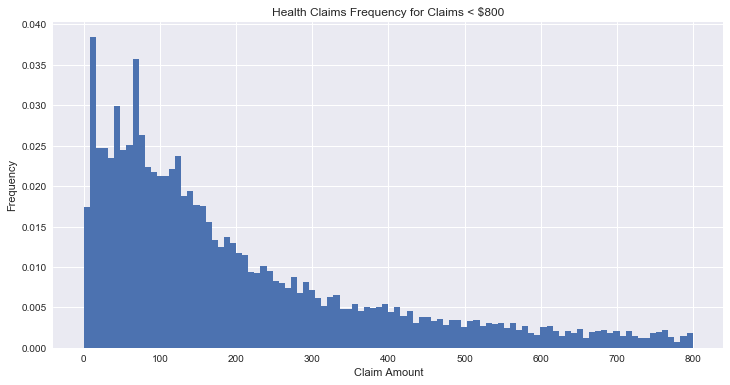

' The second histogram might be preferable because most of the data is concentrated in the sample \nof claims < $800 and therefore the second plot shows a more nunaced histogram of that sample. The first\nhistogram focuses on all claims and therefore in adding data to the plot looses nuance because the scale\nbecomes too large but the data is concentrated on oned end.'

In [15]:
""" Part A """
#descriptive statistics
print(data.describe())

#histograms 
plt.subplots(figsize=(12, 6))
weights = (1/len(data)) * np.ones_like(data["clms"])
plt.hist(data["clms"], 1000, weights = weights)
plt.title("Health Claims Frequency for All Households")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()

plt.subplots(figsize=(12, 6))
weights = (1/len(data)) * np.ones_like(data[data["clms"] < 800])
plt.hist(data[data["clms"] < 800]["clms"], 100, weights = weights)
plt.title("Health Claims Frequency for Claims < $800")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()

""" The second histogram might be preferable because most of the data is concentrated in the sample 
of claims < $800 and therefore the second plot shows a more nunaced histogram of that sample. The first
histogram focuses on all claims and therefore in adding data to the plot looses nuance because the scale
becomes too large but the data is concentrated on oned end."""

In [5]:
""" Part B """

def gamma_pdf(x, a, b): 
    
    G = math.gamma(a)
    pdf = (1/((b**a)*G))*(x**(a-1))*(np.exp(-(x/b)))
    return pdf
    
def log_lik_GA(xvals, alpha, beta):

    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GA(params, *args):

    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_GA(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

      fun: 82076.640496454755
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00145519,  0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21750964e-01,   2.19131283e+04])


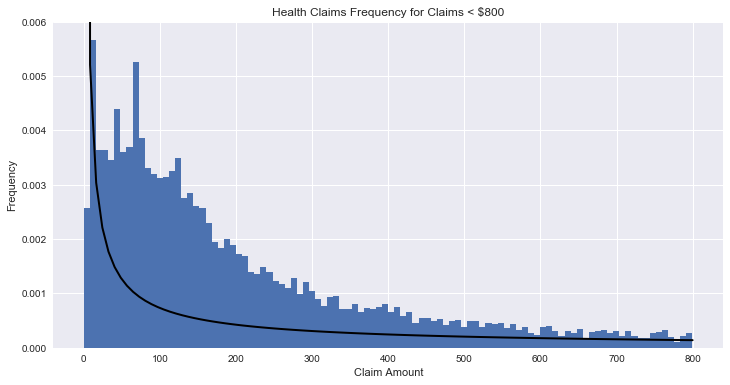

In [16]:
#calculate MLE
beta_init = data["clms"].var()/data["clms"].mean()
alpha_init = data["clms"].mean()/beta_init
params_init = np.array([alpha_init, beta_init])
mle_args = (data["clms"])
results = opt.minimize(crit_GA, params_init, args=(mle_args), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None)))
alpha_gaMLE, beta_gaMLE = results.x
print(results)

#Plot MLE with histogram 
plt.subplots(figsize=(12, 6))
weights = (1/len(data)) * np.ones_like(data[data["clms"] < 800])
plt.hist(data[data["clms"] < 800]["clms"], 100, normed = True)
plt.title("Health Claims Frequency for Claims < $800")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.ylim(0, 0.006)
dist_pts = np.linspace(1e-10, 800, 100)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha_gaMLE, beta_gaMLE),
         linewidth=2, color='k')
plt.show()

In [7]:
""" Part C """

def gg_pdf(x, a, b, m): 
    
    G = math.gamma(a/m)
    pdf = (m/((b**a)*G))*(x**(a-1))*(np.exp(-(x/b)**m))
    return pdf
    
def log_lik_GG(xvals, alpha, beta, m):

    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GG(params, *args):

    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

      fun: 82076.635630678502
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.61934474,  0.09022187, -1.08848326])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21760610e-01,   2.19131280e+04,   9.97055872e-01])


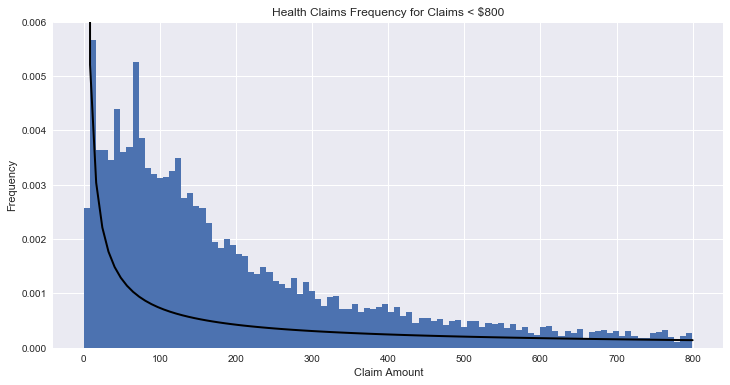

In [17]:
#calculate MLE
beta_init = beta_gaMLE
alpha_init = alpha_gaMLE
m_init = 1
params_init = np.array([alpha_init, beta_init, m_init])
mle_args = (data["clms"])
results = opt.minimize(crit_GG, params_init, args=(mle_args), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
alpha_ggMLE, beta_ggMLE, m_ggMLE = results.x
print(results)

#Plot MLE with histogram 
plt.subplots(figsize=(12, 6))
weights = (1/len(data)) * np.ones_like(data[data["clms"] < 800])
plt.hist(data[data["clms"] < 800]["clms"], 100, normed = True)
plt.title("Health Claims Frequency for Claims < $800")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.ylim(0, 0.006)
dist_pts = np.linspace(1e-10, 800, 100)
plt.plot(dist_pts, gg_pdf(dist_pts, alpha_ggMLE, beta_ggMLE, m_ggMLE),
         linewidth=2, color='k')
plt.show()

In [9]:
""" Part D """

def gb2_pdf(x, a, b, p,q): 
    
    numerator = a*x**(a*p-1)
    denominator  = b**(a*p)* scipy.special.beta(p, q)*(1 + (x/b)**a)**(p+q)
    return numerator/denominator
    
def log_lik_GB2(xvals, a, b, p, q):

    pdf_vals = gb2_pdf(xvals, a, b, p,q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GB2(params, *args):

    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

      fun: 76475.699773181055
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.74214768,   0.        ,  11.61679393,   1.08848326])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 205
      nit: 13
   status: 0
  success: True
        x: array([  7.03129382e-01,   2.13269064e+08,   9.85247647e-01,
         9.99999995e+03])


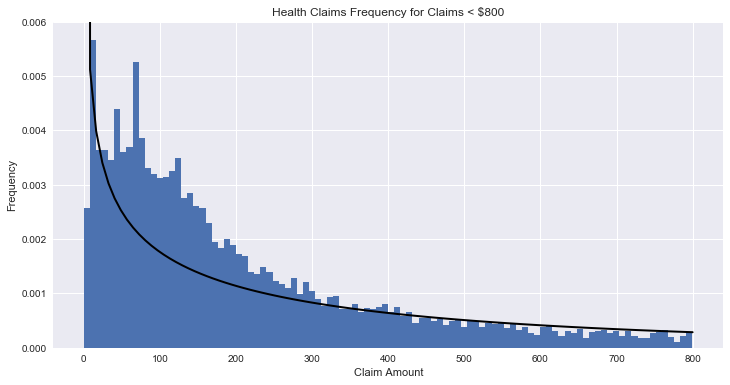

In [18]:
#calculate MLE
a_init = m_ggMLE
q_init = 10000
b_init = q_init **(m_ggMLE)*beta_ggMLE
p_init = alpha_ggMLE/m_ggMLE

params_init = np.array([a_init, b_init, p_init, q_init])
mle_args = (data["clms"])
results = opt.minimize(crit_GB2, params_init, args=(mle_args), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
a_MLE, b_MLE, p_MLE, q_MLE = results.x
print(results)

#Plot MLE with histogram 
plt.subplots(figsize=(12, 6))
weights = (1/len(data)) * np.ones_like(data[data["clms"] < 800])
plt.hist(data[data["clms"] < 800]["clms"], 100, normed = True)
plt.title("Health Claims Frequency for Claims < $800")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.ylim(0, 0.006)
dist_pts = np.linspace(1e-10, 800, 100)
plt.plot(dist_pts, gb2_pdf(dist_pts, a_MLE, b_MLE, p_MLE, q_MLE),
         linewidth=2, color='k')
plt.show()

In [11]:
""" Part E """

log_lik_h0 = log_lik_GA(data["clms"], alpha_gaMLE, beta_gaMLE)
log_lik_mle = log_lik_GB2(data["clms"], a_MLE, b_MLE, p_MLE, q_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_GA_h0 = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0-GA with 4 degrees of freedom p-value = ', pval_GA_h0)

log_lik_h0 = log_lik_GG(data["clms"], alpha_ggMLE, beta_ggMLE, m_ggMLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_GG_h0 = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0-GA with 4 degrees of freedom p-value = ', pval_GG_h0)

""" We thus reject the null hypothesis since both p-values are 0 (or very close to zero)"""

chi squared of H0-GA with 4 degrees of freedom p-value =  0.0
chi squared of H0-GA with 4 degrees of freedom p-value =  0.0


' We thus reject the null hypothesis since both p-values are 0 (or very close to zero)'

In [12]:
""" Part F """

gb2_params = (a_MLE, b_MLE, p_MLE, q_MLE)
prob_GB2 = scipy.integrate.quad(gb2_pdf, 1000, np.inf, args = gb2_params)
print(prob_GB2)

ga_params = (alpha_gaMLE, beta_gaMLE)
prob_GA = scipy.integrate.quad(gamma_pdf, 1000, np.inf, args = ga_params)
print(prob_GA)

(0.1630286955319029, 7.836024719167791e-09)
(0.4519639472347076, 8.88692155687114e-09)


In [13]:
""" Problem 2 """

' Problem 2 '

In [2]:
#load data
c, k, w, r  = np.loadtxt("/Users/Deehrlich/Desktop/BootCamp2017/Econ/Wk4_StrEst/data/MacroSeries.txt", delimiter = ",").T

In [3]:
""" Part A """

def BM_pdf(k, w, alpha, rho, mu, sigma): 
    
    zt = np.log(w/((1-alpha)*k**alpha))
    z1t = zt[:-1]
    z1t = np.insert(z1t, 0, mu)
    prob = scipy.stats.norm(rho*z1t + (1-rho)*mu, sigma).pdf(zt)
    return prob
    
def log_lik_BM(k, w, alpha, rho, mu, sigma):

    pdf_vals = BM_pdf(k, w, alpha, rho, mu, sigma)
    pdf_vals[pdf_vals == 0] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_BM(params, *args):

    alpha, rho, mu, sigma = params
    k, w = args
    log_lik_val = log_lik_BM(k, w, alpha, rho, mu, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [4]:
#calculate MLE
alpha_init = 0.5
rho_init = 0.5
mu_init = 1
sigma_init = 10

params_init = np.array([alpha_init, rho_init, mu_init, sigma_init])
mle_args = (k, w)
results = opt.minimize(crit_BM, params_init, args=(mle_args), method='L-BFGS-B', \
                       bounds=((1e-10, 0.999999), (-0.999999, 0.999999), (1e-10, None), (1e-10, None)))
alpha_BM_MLE, rho_BM_MLE, mu_BM_MLE, sigma_BM_MLE = results.x
print(results)
print(results.hess_inv(np.eye(4)))

      fun: -96.653737478260936
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  9.50706180e-04,  -4.12114787e-05,   7.81597009e-05,
        -6.43751719e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 375
      nit: 45
   status: 0
  success: True
        x: array([ 0.70203026,  0.47986829,  6.2548407 ,  0.09204513])
[[  1.34298948e+01  -2.39732449e+01  -1.66336278e+02   2.54699918e-01]
 [ -2.39732449e+01   4.28226570e+01   2.96915521e+02  -4.53317436e-01]
 [ -1.66336278e+02   2.96915521e+02   2.06017302e+03  -3.15990753e+00]
 [  2.54699918e-01  -4.53317436e-01  -3.15990753e+00   7.58407087e-03]]


In [5]:
""" Part B """

def BM2_pdf(k, r, alpha, rho, mu, sigma): 
    
    zt = np.log(r/((alpha)*k**(alpha-1)))
    z1t = zt[:-1]
    z1t = np.insert(z1t, 0, mu)
    prob = scipy.stats.norm(rho*z1t + (1-rho)*mu, sigma).pdf(zt)
    return prob
    
def log_lik_BM2(k, r, alpha, rho, mu, sigma):

    pdf_vals = BM2_pdf(k, r, alpha, rho, mu, sigma)
    pdf_vals[pdf_vals == 0] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_BM2(params, *args):

    alpha, rho, mu, sigma = params
    k, r = args
    log_lik_val = log_lik_BM2(k, r, alpha, rho, mu, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [8]:
#calculate MLE
alpha_init = 0.5
rho_init = 0.5
mu_init = 0.5
sigma_init = 9.5

params_init = np.array([alpha_init, rho_init, mu_init, sigma_init])
mle_args = (k, r)
results = opt.minimize(crit_BM2, params_init, args=(mle_args), method='L-BFGS-B', \
                       bounds=((1e-10, 0.999999), (-0.999999, 0.999999), (1e-10, None), (1e-10, None)))
alpha_BM_MLE_2, rho_BM_MLE_2, mu_BM_MLE_2, sigma_BM_MLE_2 = results.x
print(results)
print(results.hess_inv(np.eye(4)))

      fun: -96.70690802638056
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.65982783e-03,  -2.13162821e-05,  -8.10018719e-05,
         8.82494078e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 330
      nit: 32
   status: 0
  success: True
        x: array([ 0.45748038,  0.72051524,  9.37093892,  0.09199627])
[[  3.52721625e+01  -2.71774946e+01  -6.44106831e+02   1.68313973e+00]
 [ -2.71774946e+01   2.09507414e+01   4.96286934e+02  -1.29621216e+00]
 [ -6.44106831e+02   4.96286934e+02   1.17620754e+04  -3.07369866e+01]
 [  1.68313973e+00  -1.29621216e+00  -3.07369866e+01   8.05837002e-02]]


In [7]:
""" Part C """
zstar  = np.log(1/((alpha_BM_MLE_2)*7500000**(alpha_BM_MLE_2 -1)))
probr  = 1 - scipy.stats.norm.cdf(zstar, rho_BM_MLE_2*10 + (1-rho_BM_MLE_2)*mu_BM_MLE_2, sigma_BM_MLE_2)
print("Probability of interest rate greater than 1 = ", probr)

Probability of interest rate greater than 1 =  1.0


In [ ]:
""" Problem 3 """

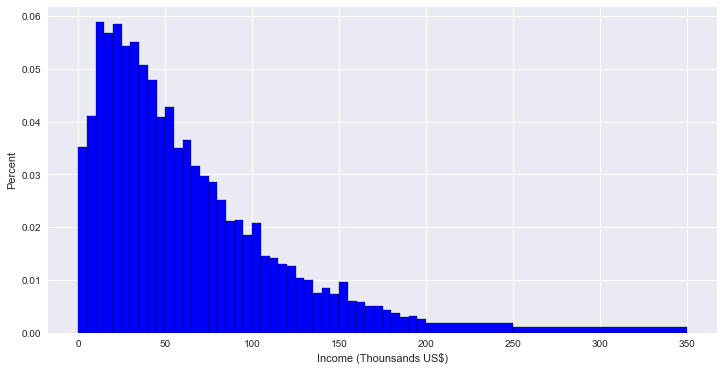

In [117]:
""" Part A """
#load data
data = np.loadtxt("/Users/Deehrlich/Desktop/BootCamp2017/Econ/Wk4_StrEst/data/usincmoms.txt")
p = data[:,0]
m = data[:,1]

#graph histogram
plt.subplots(figsize=(12, 6))
p[-2] = p[-2]/10
p[-1] = p[-1]/20
width = np.concatenate((5*np.ones_like(p[:-2]), np.array([50]), np.array([100]) ))
plt.bar(m/1000, p, width=width, facecolor='blue', edgecolor='k')
plt.xlabel("Income (Thounsands US$)")
plt.ylabel("Percent")
plt.show()

In [139]:
""" Part B """
def lognorm(x, mu, sigma):
    pdf_vals= (1/x) *(1/ (sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 /(2 * sigma**2)))
    pdf_vals[pdf_vals==0] = 1e-10
    return pdf_vals

def model_moments(m, mu, sigma):
    pdf_vals = 5000*lognorm(m, mu, sigma)
    pdf_vals[pdf_vals == 0] = 1e-10
    return pdf_vals

def err_vec(p, m, mu, sigma, simple=False):
    moms_model = model_moments(m, mu, sigma)
    moms_data = p
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    mu, sigma = params
    p, m, W = args
    err = err_vec(p, m, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val

      fun: 0.032516124776686889
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.39253062e-06,  -1.56819002e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 8
   status: 0
  success: True
        x: array([ 10.84684127,   1.0296976 ])


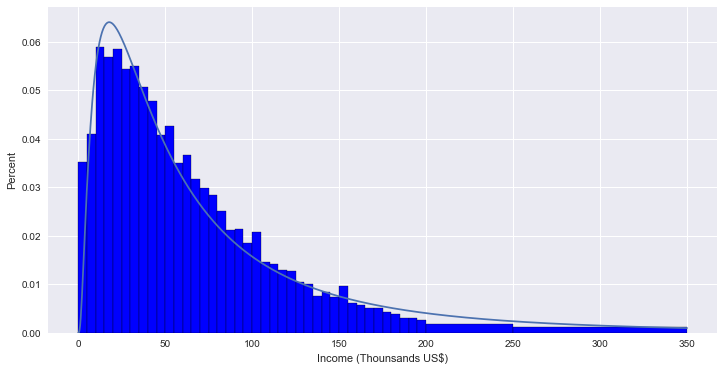

In [140]:
#get GMM
mu_init = np.log(np.mean(p@m))
sigma_init = 2
params_init = np.array([mu_init, sigma_init])
W_hat = np.diag(p)
gmm_args = (p, m, W_hat)
results = opt.minimize(criterion, params_init, args = (gmm_args), method='L-BFGS-B', \
                      bounds = ((None, None), (1e-10, None)))
mu_GMMlog, sigma_GMMlog = results.x
print(results)

#plot results
plt.subplots(figsize=(12, 6))
plt.bar(m/1000, p, width=width, facecolor='blue', edgecolor='k')
x = np.linspace(1e-10,350000,1000)
ylog = 5000*lognorm(x, mu_GMMlog, sigma_GMMlog)
plt.plot(x/1000, ylog)
plt.xlabel("Income (Thounsands US$)")
plt.ylabel("Percent")
plt.show()

In [141]:
""" Part C """

def model_moments(m, alpha, beta):
    mod_moments = 5e3 * gamma_pdf(m, alpha, beta)
    return mod_moments

def err_vec(p, m, alpha, beta, simple=False):
    moms_model = model_moments(m, alpha, beta)
    moms_data = p
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion(params, *args):
    alpha, beta = params
    p, m, W = args
    err = err_vec(p, m, alpha, beta)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val

      fun: 0.0062921367479008171
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.52100554e-06,  -4.33680869e-10])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 108
      nit: 27
   status: 0
  success: True
        x: array([  1.43442444e+00,   4.44283736e+04])


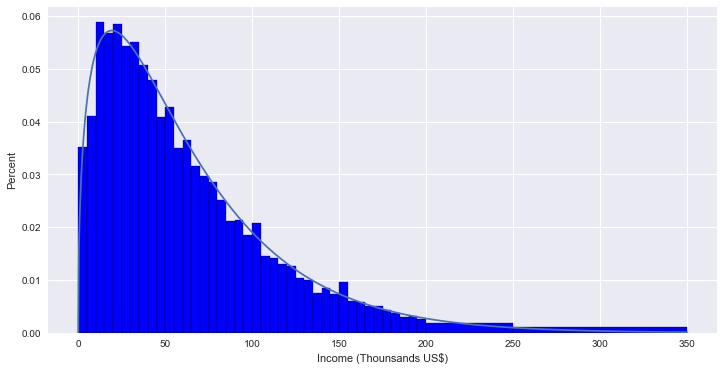

In [142]:
#get GMM
alpha_init = 3
beta_init = 20000
params_init = np.array([alpha_init, beta_init])
results = opt.minimize(criterion, params_init, args= (gmm_args), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None)))
alpha_GMMgam, beta_GMMgam = results.x
print(results)

#plot results
plt.subplots(figsize=(12, 6))
plt.bar(m/1000, p, width=width, facecolor='blue', edgecolor='k')
ygam = 5000* gamma_pdf(x, alpha_GMMgam, beta_GMMgam)
plt.plot(x/1000, ygam)
plt.xlabel("Income (Thounsands US$)")
plt.ylabel("Percent")
plt.show()

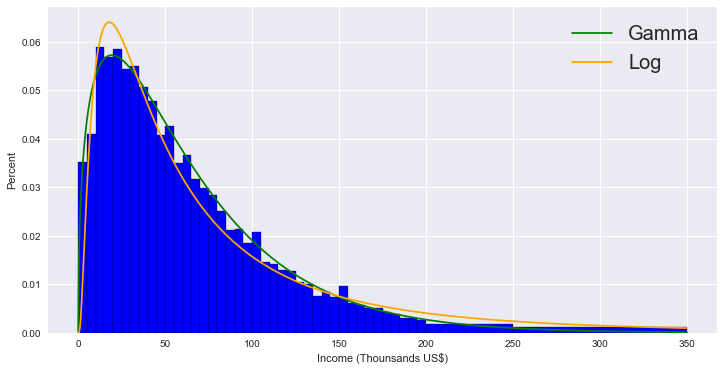

" The most precise way to tell which distribution fits the data better is by using the value of the 'fun'\narguement returned by the minimization. The smaller the value, the better the fit. Therefore the gamma\nis a better fit than the log normal."

In [137]:
""" Part D """
plt.subplots(figsize=(12, 6))
plt.bar(m/1000, p, width=width, facecolor='blue', edgecolor='k')
plt.plot(x/1000, ygam, color = "green", label = "Gamma")
plt.plot(x/1000, ylog, color = "orange", label = "Log")
plt.xlabel("Income (Thounsands US$)")
plt.ylabel("Percent")
plt.legend(prop={'size':20})
plt.show()

""" The most precise way to tell which distribution fits the data better is by using the value of the 'fun'
arguement returned by the minimization. The smaller the value, the better the fit. Therefore the gamma
is a better fit than the log normal."""

      fun: 2.6261094526147402e-13
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.26793354e-06,   2.24225027e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 4
   status: 0
  success: True
        x: array([  3.51103312e+00,   2.00000001e+04])


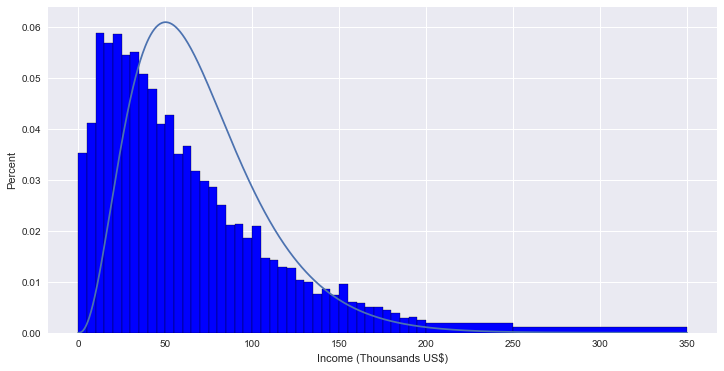

In [143]:
""" Part E """
#Get GMM
err = np.array([err_vec(m, p, alpha_GMMgam, beta_GMMgam)])
VCV2 = (err.T@err)/len(p)
W_hat2 = lin.pinv(VCV2)
gmm_args = (p, m, W_hat2)
results = opt.minimize(criterion, params_init, args= (gmm_args), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None)))
alpha_GMMgam2, beta_GMMgam2 = results.x
print(results)

#plot results
plt.subplots(figsize=(12, 6))
plt.bar(m/1000, p, width=width, facecolor='blue', edgecolor='k')
ygam2 = 5000* gamma_pdf(x, alpha_GMMgam2, beta_GMMgam2)
plt.plot(x/1000, ygam2)
plt.xlabel("Income (Thounsands US$)")
plt.ylabel("Percent")
plt.show()

In [ ]:
""" Problem 4 """

In [10]:
""" Part 1 """

def data_moments():

    mom1 = 1e-20
    mom2 = 1e-20
    mom3 = 1e-20
    mom4 = 1e-20
    return mom1, mom2, mom3, mom4

def model_moments(c, k, w, r, alpha, beta, rho, mu):

    zt = np.log(r/((alpha)*k**(alpha-1)))
    zt1 = zt[1:]
    zt = zt[:-1]
    
    kt1 = k[1:]
    kt = k[:-1]
    
    ct1 = c[1:]
    ct = c[:-1]
    
    wt = w[:-1]
    
    mom1 = ((zt1 - rho*zt - (1-rho)*mu)).mean()
    mom2 = ((zt1 - rho*zt - (1-rho)*mu)*zt).mean()
    mom3 = ((beta*alpha*np.exp(zt1)*(kt1)**(alpha-1)*(ct/ct1)-1)).mean()
    mom4 = (((beta*alpha*np.exp(zt1)*(kt1)**(alpha-1)*(ct/ct1)-1)*wt)).mean()
    
    return mom1, mom2, mom3, mom4

def err_vec(c, k, w, r, alpha, beta, rho, mu, simple):
 
    momd1, momd2, momd3, momd4 = data_moments()
    moms_data = np.array([[momd1], [momd2], [momd3], [momd4]])
    mom1, mom2, mom3, mom4 = model_moments(c, k, w, r, alpha, beta, rho, mu)
    moms_model = np.array([[mom1], [mom2], [mom3], [mom4]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    alpha, beta, rho, mu = params
    c, k, w, r, W = args
    err = err_vec(c, k, w, r, alpha, beta, rho, mu, simple=True)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val

In [17]:
alpha_init = 0.2
beta_init = 0.2
rho_init = 0.2
mu_init = 5

params_init = np.array([alpha_init, beta_init, rho_init, mu_init])
W_hat = np.eye(4)
gmm_args = (c, k, w, r, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args), method='L-BFGS-B', \
                       bounds=((1e-10, 0.9999999), (1e-10, 0.9999999),(-0.9999999, 0.9999999),(1e-10, None)))

alpha_GMM, beta_GMM, rho_GMM, mu_GMM = results.x
print('alpha_GMM1=', alpha_GMM, 'beta_GMM1=', beta_GMM , 'rho_GMM1=', rho_GMM , 'mu_GMM1=', mu_GMM)

alpha_GMM1= 0.700099510222 beta_GMM1= 0.989999995505 rho_GMM1= 0.36907324493 mu_GMM1= 5.01459974233


In [16]:
momd1, momd2, momd3, momd4  = data_moments()
mom1, mom2, mom3, mom4  = model_moments(c, k, w, r, alpha_GMM, beta_GMM, rho_GMM, mu_GMM)
err1 = err_vec(c, k, w, r,  alpha_GMM, beta_GMM, rho_GMM, mu_GMM, True).reshape(4,)

print('Data Moment 1 =', momd1, ',Data Moment 2 =', momd2, ',Data Moment 3 =', momd3, ', Data Moment 4 =', momd4)
print('Model Moment 1 =', mom1, ',Model Moment 2 =', mom2, ',Model Moment 3 =', mom3, ',Model Moment 4 =', mom4)
print('Error vector =', err1)
print(results)

Data Moment 1 = 1e-20 ,Data Moment 2 = 1e-20 ,Data Moment 3 = 1e-20 , Data Moment 4 = 1e-20
Model Moment 1 = -0.000865141179308 ,Model Moment 2 = 0.000681416166762 ,Model Moment 3 = -5.03850642241e-09 ,Model Moment 4 = -0.0524783500595
Error vector = [ -8.65141179e-04   6.81416167e-04  -5.03850642e-09  -5.24783501e-02]
      fun: array([[ 0.00275519]])
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.71013906e-01,   2.62955571e+03,   1.38697647e-05,
        -9.00099405e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 175
      nit: 25
   status: 0
  success: True
        x: array([  0.42216792,   0.99      ,   0.2438678 ,  10.0082283 ])
